# DrivenData Machine Learning with a Heart
Detect heart disease from patient cardiovascular dataset. The objective of this project is to predict the binary class, `heart_disease_present`, which represents whether or not a patient has heart disease:
- `0` represents no heart disease present
- `1` represents heart disease present

DrivenData [competition info here](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/); data provided by [Cleveland Heart Disease Database](http://archive.ics.uci.edu/ml/datasets/statlog+(heart)) via the UCI Machine Learning repository

- Invert values for `num_major_vessels` (0-3) values should change to (3-0) ie 1 changes to 2, 0, changes to 3
- Invert values for `ST_depression` - values represent where ST segment is abnormally low below baseline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv')
labels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/54/public/train_labels.csv')
labels.drop(['patient_id'],axis=1,inplace=True)

In [3]:
df['label'] = labels['heart_disease_present']

In [4]:
for x in df:
    print(x)

patient_id
slope_of_peak_exercise_st_segment
thal
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
serum_cholesterol_mg_per_dl
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina
label


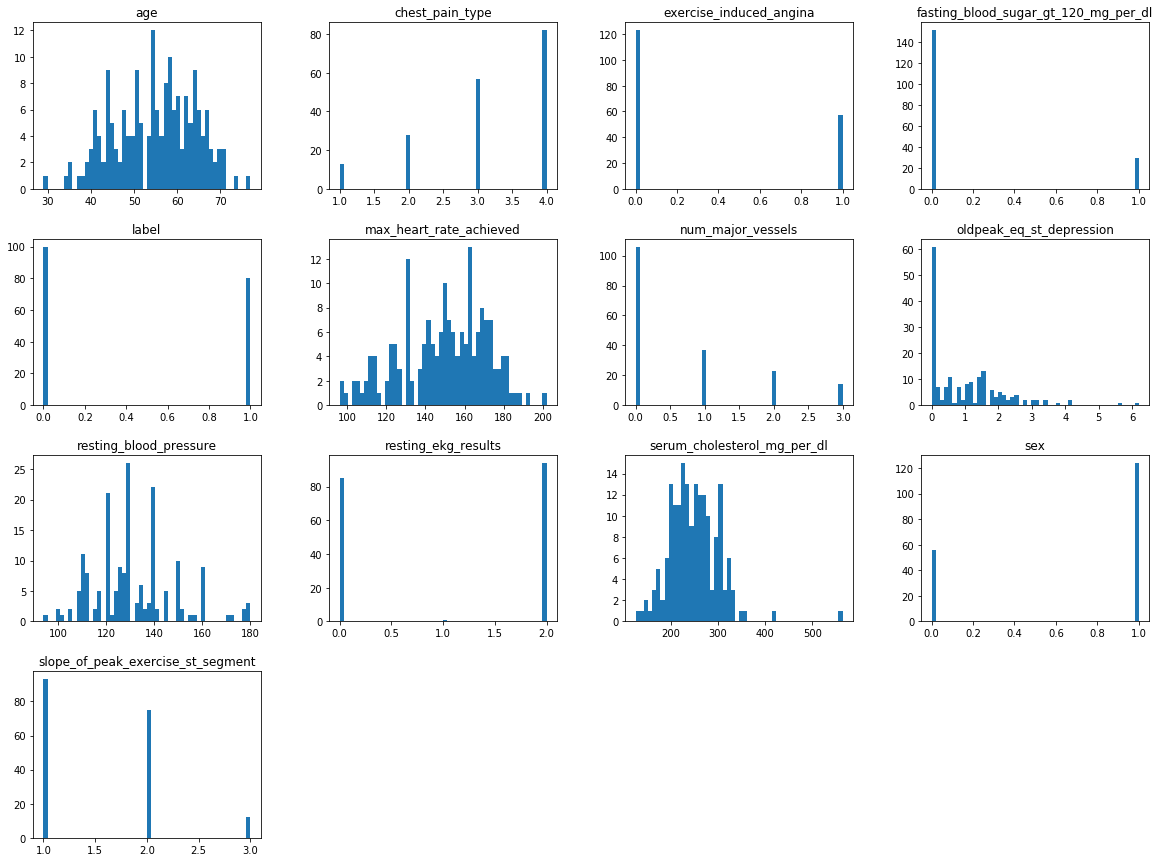

In [5]:
df.hist(bins=50, figsize=(20,15),grid=False)
plt.show()

In [6]:
cats = ['chest_pain_type',
        'exercise_induced_angina',
        'fasting_blood_sugar_gt_120_mg_per_dl',
        'num_major_vessels',
        'resting_ekg_results',
        'sex',
        'slope_of_peak_exercise_st_segment',
       ]

In [7]:
num = ['resting_blood_pressure',
       'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression',
       'age',
       'max_heart_rate_achieved',]

In [8]:
def kde_by_label(feature,df=df):
    title = feature.replace("_"," ").title()
    fig, axs = plt.subplots(sharey=True,sharex=True,figsize=(15,4))
    df.groupby('label')[feature].plot(kind='kde', 
                                           ax=axs,
                                           alpha=0.8,
                                           title=title)
    plt.legend()
    plt.show()

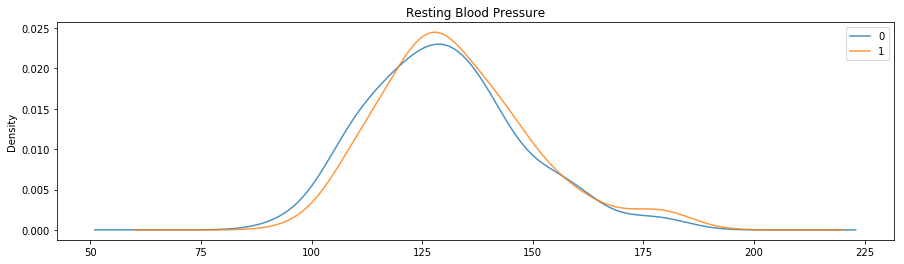

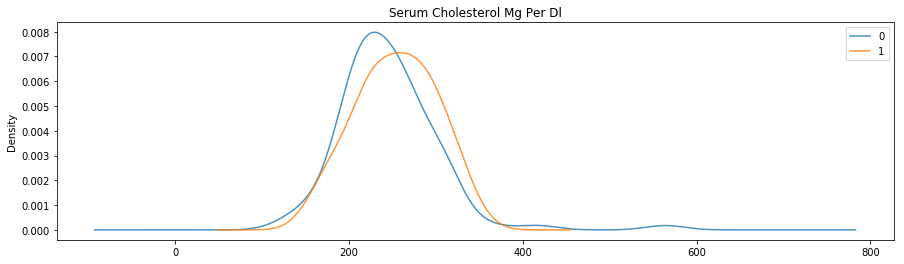

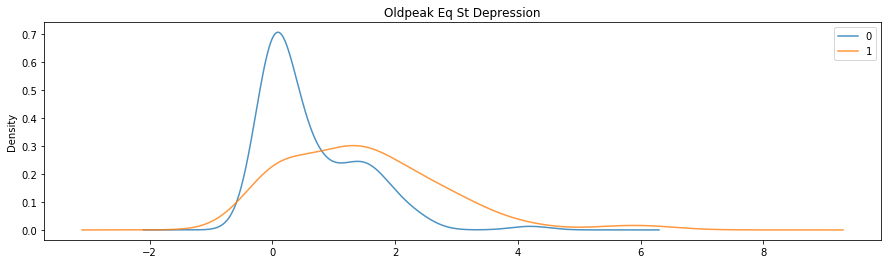

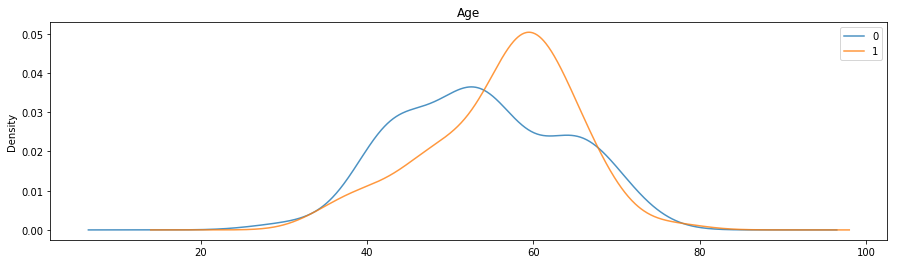

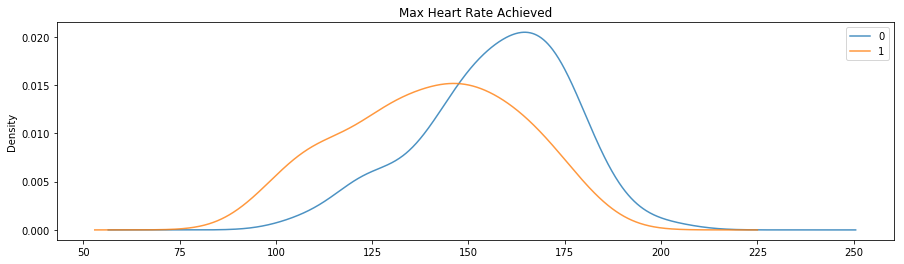

In [9]:
for x in num:
    kde_by_label(x)

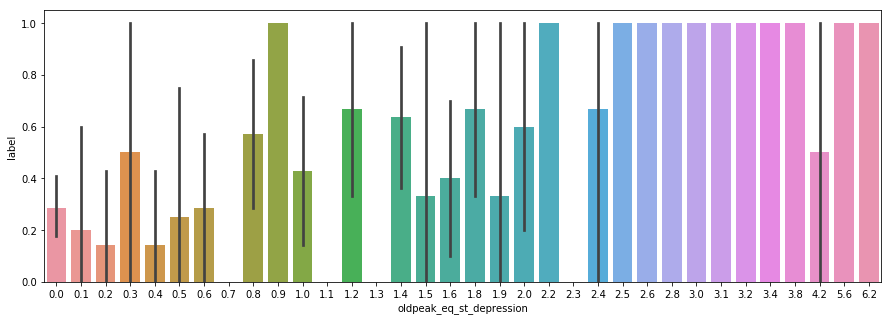

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['oldpeak_eq_st_depression'],y=df['label'])

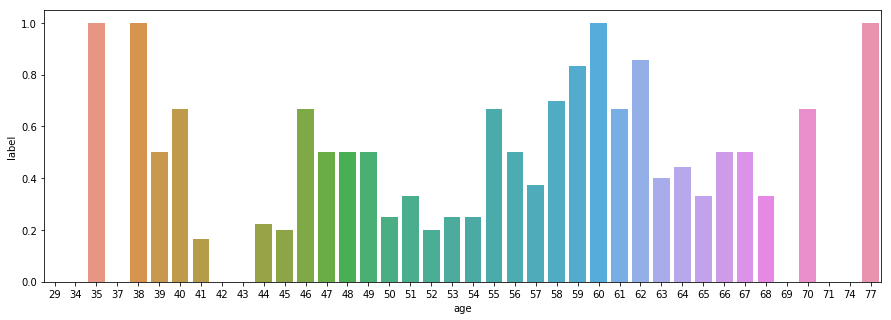

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['age'],y=df['label'], ci=None)

In [ ]:
#plt.figure(figsize=(15,5))
#sns.lineplot(x=df['max_heart_rate_achieved'],y=df['label'])

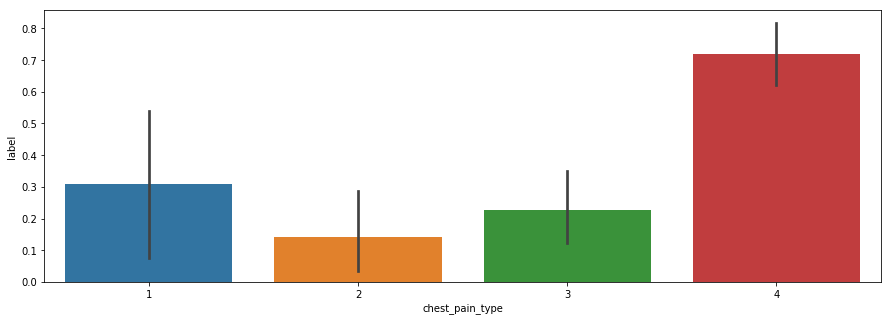

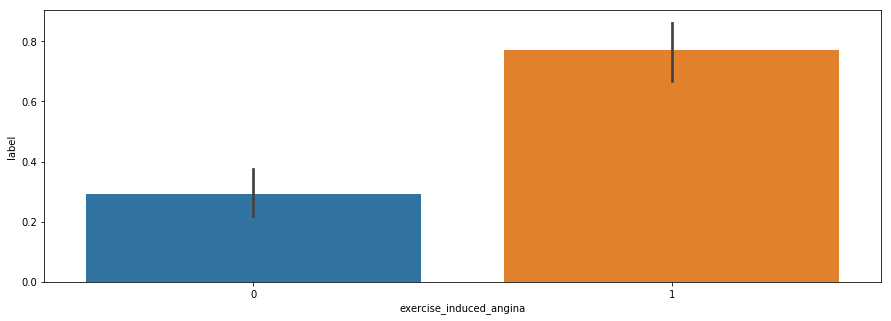

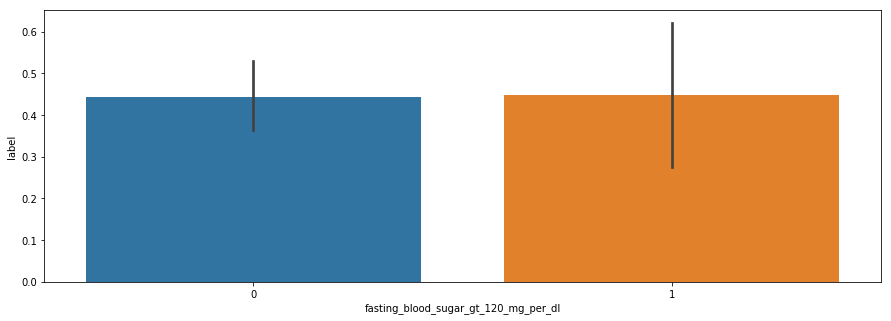

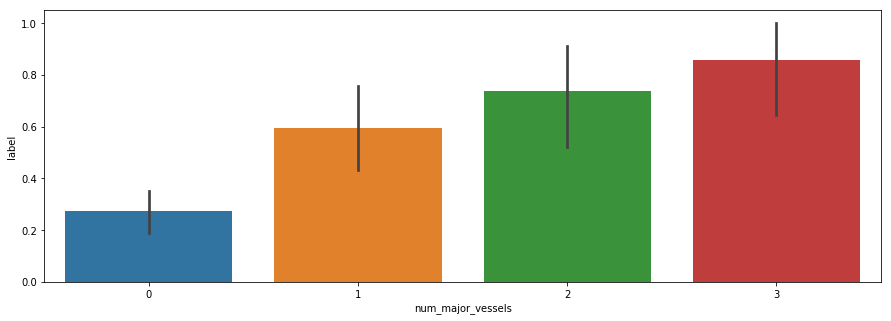

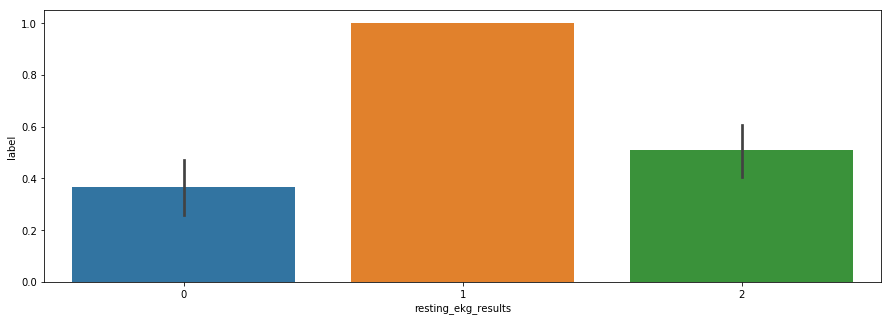

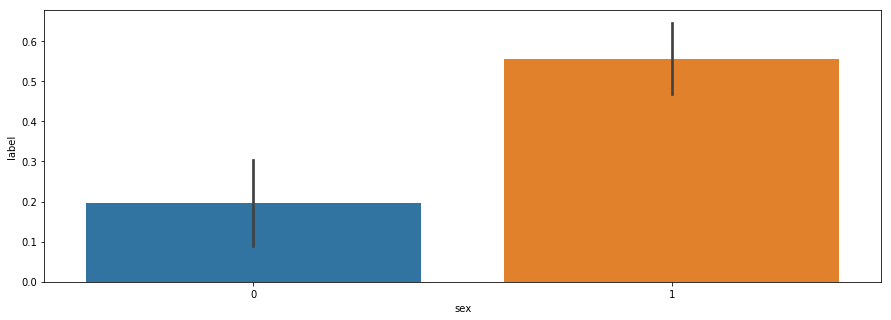

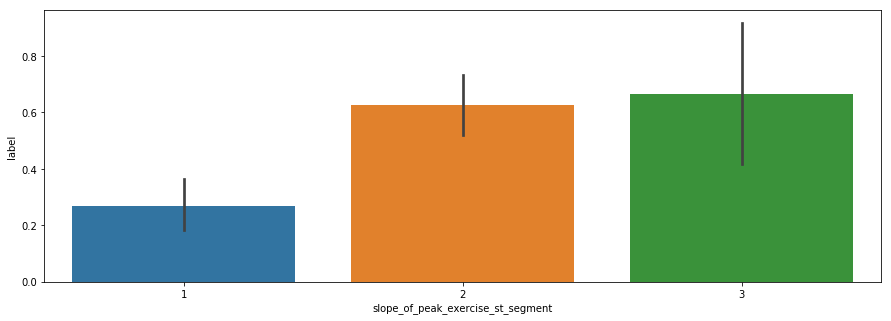

In [12]:
for x in cats:
    plt.figure(figsize=(15,5))
    sns.barplot(x=df[x],y=df['label'])

In [13]:
df.drop('label',axis=1,inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

In [15]:
X_train[cats] = X_train[cats].astype('category')

/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 117 to 102
Data columns (total 14 columns):
patient_id                              144 non-null object
slope_of_peak_exercise_st_segment       144 non-null category
thal                                    144 non-null object
resting_blood_pressure                  144 non-null int64
chest_pain_type                         144 non-null category
num_major_vessels                       144 non-null category
fasting_blood_sugar_gt_120_mg_per_dl    144 non-null category
resting_ekg_results                     144 non-null category
serum_cholesterol_mg_per_dl             144 non-null int64
oldpeak_eq_st_depression                144 non-null float64
sex                                     144 non-null category
age                                     144 non-null int64
max_heart_rate_achieved                 144 non-null int64
exercise_induced_angina                 144 non-null category
dtypes: category(7), float64(1), int64(4),

In [17]:
X_train.shape

(144, 14)

In [18]:
X_train.drop(['patient_id'],axis=1,inplace=True)
#X_train.loc[:,'thal'] = X_train.loc[:,'thal'].astype('category')
#X_train.loc[:,'chest_pain_type'] = X_train.loc[:,'chest_pain_type'].astype('category')
#X_train['thal'].value_counts()

/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


normal               79
reversible_defect    58
fixed_defect          7
Name: thal, dtype: int64

In [ ]:
# Apply Box-Cox transformation
from scipy.stats import boxcox



In [ ]:
#test_poly = PolynomialFeatures(2)
#test_poly.fit_transform(X_train[num])

In [ ]:
#test_poly.get_feature_names()

In [ ]:
#PolynomialFeatures(2).get_feature_names(input_features=X_train[num])

In [ ]:
#PolynomialFeatures().fit_transform(X_train)

In [ ]:
#X_train.info()

In [ ]:
#X_train.describe()

In [ ]:
#X_train.hist(bins=50, figsize=(20,15),grid=False)
#plt.show()

In [ ]:
#X_train['label'] = y_train

- Age: heart disease patients likely to be close to 60
- Resting BP: Females with higher resting BP likely to have heart diease
- Cholesterol: Higher cholesterol slightly more likely to have heart disease
- ST depression greater than 0 likely heart disease patient; consider changing to binary variable


#### Discrete variables

In [ ]:
len(X_train[X_train['sex']==0])

In [ ]:
len(X_train[X_train['sex']==1])

In [ ]:
#fig, axs = plt.subplots(ncols=4)
#loc = 0
#for x in X_train:
#    X_train.groupby('label')[x].plot(kind='kde', ax=axs[loc])
#    loc += 1

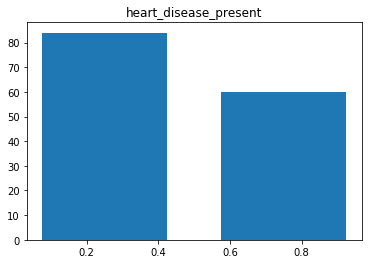

In [19]:
y_train.hist(bins=2,rwidth=.7,grid=False)
plt.show()

In [ ]:
"""def get_cat_num_labels(df):
    num = []
    cat = []
    for col in df.columns:
        if df[col].dtype == 'float64':
            num.append(col)
        elif df[col].dtype == 'int64':
            num.append(col)
        else:
            cat.append(col)
    return num, cat"""

In [20]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [31]:
num_pipeline = Pipeline([
    ('df_selector',DataFrameSelector(num)),
    ('Normalizer', MinMaxScaler(feature_range=(0,1))),
])

cat_pipeline = Pipeline([
    ('df_selector',DataFrameSelector(cats)),
    #('Normalizer', MinMaxScaler(feature_range=(0,1))),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))])

pipe_OG = Pipeline([('feats',FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline',cat_pipeline),
])),#('poly',PolynomialFeatures(2)),
                ])

In [32]:
X_train_OG = pipe_OG.fit_transform(X_train)

In [21]:
num_pipeline = Pipeline([
    ('df_selector',DataFrameSelector(num)),
    ('Normalizer', MinMaxScaler(feature_range=(0,1))),
])

cat_pipeline = Pipeline([
    ('df_selector',DataFrameSelector(cats)),
    #('Normalizer', MinMaxScaler(feature_range=(0,1))),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))])

pipe = Pipeline([('feats',FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline',cat_pipeline),
])),('poly',PolynomialFeatures(2)),
                ])

In [22]:
y_train = y_train['heart_disease_present'].values

In [23]:
X_train_poly = pipe.fit_transform(X_train)

In [28]:
X_train_poly.shape

(144, 351)

In [29]:
X_train.shape

(144, 13)

### Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_OG, y_train)
scores = cross_val_score(forest_clf, X_train_OG, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

for i in range(1, X_train_poly.shape[1]+1, 1):
    #select i features
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly,y_train)
    X_train_poly_selected = select.transform(X_train_poly)
    
    # Model with i features selected
    forest_clf.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(forest_clf, X_train_poly_selected, y_train, cv=10)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, np.mean(scores), np.std(scores)))
    
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_features_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) < std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
print('Number of features with highest score: %i' % k_features_highest_score)

CV accuracy (original): 0.806 +/- 0.051
CV accuracy (number of features = 1): 0.770 +/- 0.074
CV accuracy (number of features = 2): 0.756 +/- 0.069
CV accuracy (number of features = 3): 0.714 +/- 0.089
CV accuracy (number of features = 4): 0.741 +/- 0.112
CV accuracy (number of features = 5): 0.741 +/- 0.112
CV accuracy (number of features = 6): 0.784 +/- 0.076
CV accuracy (number of features = 7): 0.798 +/- 0.067
CV accuracy (number of features = 8): 0.805 +/- 0.087
CV accuracy (number of features = 9): 0.791 +/- 0.076
CV accuracy (number of features = 10): 0.800 +/- 0.076
CV accuracy (number of features = 11): 0.813 +/- 0.091
CV accuracy (number of features = 12): 0.813 +/- 0.091
CV accuracy (number of features = 13): 0.806 +/- 0.101
CV accuracy (number of features = 14): 0.813 +/- 0.091
CV accuracy (number of features = 15): 0.800 +/- 0.076
CV accuracy (number of features = 16): 0.821 +/- 0.089
CV accuracy (number of features = 17): 0.814 +/- 0.089
CV accuracy (number of features = 

CV accuracy (number of features = 149): 0.785 +/- 0.056
CV accuracy (number of features = 150): 0.791 +/- 0.082
CV accuracy (number of features = 151): 0.791 +/- 0.076
CV accuracy (number of features = 152): 0.806 +/- 0.066
CV accuracy (number of features = 153): 0.777 +/- 0.069
CV accuracy (number of features = 154): 0.792 +/- 0.053
CV accuracy (number of features = 155): 0.820 +/- 0.068
CV accuracy (number of features = 156): 0.806 +/- 0.066
CV accuracy (number of features = 157): 0.806 +/- 0.066
CV accuracy (number of features = 158): 0.820 +/- 0.073
CV accuracy (number of features = 159): 0.799 +/- 0.070
CV accuracy (number of features = 160): 0.806 +/- 0.066
CV accuracy (number of features = 161): 0.785 +/- 0.055
CV accuracy (number of features = 162): 0.784 +/- 0.073
CV accuracy (number of features = 163): 0.785 +/- 0.046
CV accuracy (number of features = 164): 0.799 +/- 0.077
CV accuracy (number of features = 165): 0.791 +/- 0.069
CV accuracy (number of features = 166): 0.778 +/

CV accuracy (number of features = 296): 0.799 +/- 0.072
CV accuracy (number of features = 297): 0.778 +/- 0.068
CV accuracy (number of features = 298): 0.799 +/- 0.077
CV accuracy (number of features = 299): 0.770 +/- 0.071
CV accuracy (number of features = 300): 0.778 +/- 0.069
CV accuracy (number of features = 301): 0.778 +/- 0.059
CV accuracy (number of features = 302): 0.764 +/- 0.071
CV accuracy (number of features = 303): 0.785 +/- 0.057
CV accuracy (number of features = 304): 0.785 +/- 0.055
CV accuracy (number of features = 305): 0.784 +/- 0.079
CV accuracy (number of features = 306): 0.785 +/- 0.057
CV accuracy (number of features = 307): 0.778 +/- 0.061
CV accuracy (number of features = 308): 0.798 +/- 0.066
CV accuracy (number of features = 309): 0.792 +/- 0.043
CV accuracy (number of features = 310): 0.778 +/- 0.074
CV accuracy (number of features = 311): 0.785 +/- 0.057
CV accuracy (number of features = 312): 0.792 +/- 0.081
CV accuracy (number of features = 313): 0.799 +/

In [38]:
select = SelectKBest(score_func=chi2, k=k_features_highest_score)
select.fit(X_train_poly,y_train)
X_train_poly_selected = select.transform(X_train_poly)

### Model Evaluation

In [39]:
model_dict = {
    'SGD':SGDClassifier(max_iter=1000,tol=0.001,random_state=42),
    'Logistic Regression':LogisticRegression(solver='lbfgs',random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'SVC':SVC(gamma='auto',random_state=42),
    'SVC Poly':SVC(kernel='poly',gamma='auto',random_state=42),
    'KNN':KNeighborsClassifier(),
    'Forest':RandomForestClassifier(n_estimators=100,random_state=42),
    'Extra Trees':ExtraTreesClassifier(n_estimators=1000,random_state=42),
    'Adaboost':AdaBoostClassifier(random_state=42),
    'XGBoost':XGBClassifier()
}

In [46]:
def model_eval(X, y, model_dict=model_dict, cv=10, scoring="roc_auc"):
    scores_df = pd.DataFrame()
    for model in model_dict:
        cvs = cross_val_score(model_dict[model], X, y, cv=cv, scoring=scoring)
        scores_df[model] = cvs
    return scores_df

In [47]:
scores_df = model_eval(X_train_poly_selected, y_train)
scores_df.describe()[1:]

,SGD,Logistic Regression,Decision Tree,SVC,SVC Poly,KNN,Forest,Extra Trees,Adaboost,XGBoost
mean,0.837269,0.891435,0.868634,0.890046,0.856481,0.846991,0.886343,0.885069,0.862153,0.871759
std,0.098185,0.073456,0.107951,0.082977,0.099588,0.104662,0.082207,0.087522,0.083847,0.073584
min,0.625000,0.796296,0.629630,0.777778,0.708333,0.677083,0.777778,0.740741,0.729167,0.777778
25%,0.797454,0.826389,0.827836,0.821759,0.780093,0.763889,0.815394,0.817130,0.812500,0.817130
50%,0.842593,0.877315,0.880208,0.868056,0.869213,0.847801,0.884259,0.877315,0.854167,0.858796
75%,0.906250,0.953125,0.922164,0.968750,0.932292,0.934896,0.963542,0.968750,0.934028,0.906250
max,0.979167,1.000000,1.000000,1.000000,1.000000,0.979167,1.000000,1.000000,0.979167,1.000000


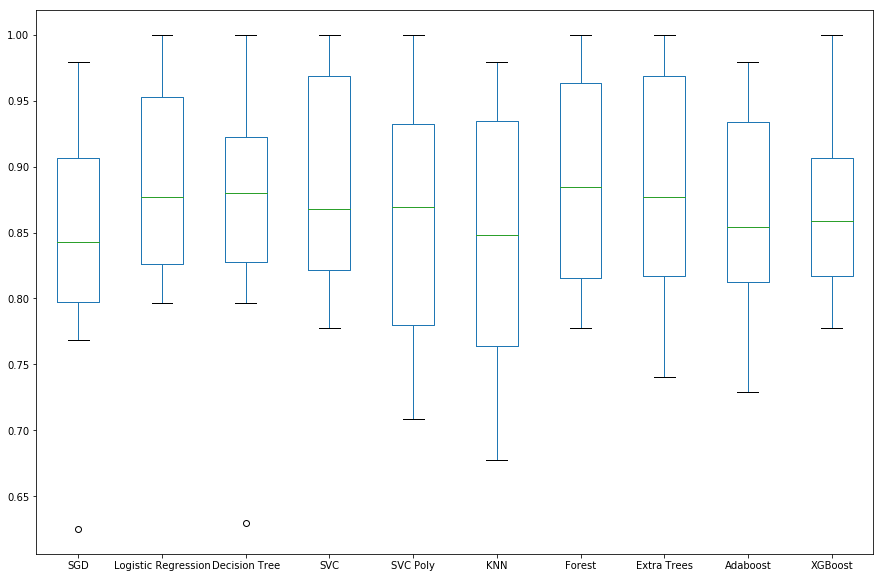

In [48]:
scores_df.plot(kind='box', figsize=(15,10))

### Hyperparameter Tuning

#### XGBoost

In [ ]:
param_grid = [
    {'max_depth':[3,6,10,15],
     'n_estimators':[10,100,500,1000],
     'gamma':[0,0.5,1]
    }
]

In [ ]:
grid_search = GridSearchCV(XGBClassifier(n_jobs=-1), param_grid, cv=10, scoring="roc_auc")
grid_search.fit(X_train1, y_train)

In [ ]:
cvres = grid_search.cv_results_

In [ ]:
cvres = grid_search.cv_results_
cv_results = sorted([(x,y) for x,y in zip(cvres["mean_test_score"],cvres["params"])],key=lambda x: x[0],reverse=True)
for AUC, params in cv_results:
    print(round(AUC,5), params)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

#### Random Forest

In [73]:
param_grid = [
    {'max_depth':[3,4],
     'n_estimators':[425,440,450,460],
     'bootstrap':[True],
    }
]

In [74]:
grid_search_forest = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=10, scoring="roc_auc")
grid_search_forest.fit(X_train_poly_selected, y_train)

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [3, 4], 'n_estimators': [425, 440, 450, 460], 'bootstrap': [True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [75]:
grid_search_forest.best_score_

0.8902391975308643

In [76]:
cvres_forest = grid_search_forest.cv_results_
cv_results_forest = sorted([(x,y) for x,y in zip(cvres_forest["mean_test_score"],cvres_forest["params"])],key=lambda x: x[0],reverse=True)
for AUC, params in cv_results_forest[:10]:
    print(round(AUC,5), params)

0.89024 {'bootstrap': True, 'max_depth': 4, 'n_estimators': 450}
0.89024 {'bootstrap': True, 'max_depth': 4, 'n_estimators': 460}
0.89005 {'bootstrap': True, 'max_depth': 4, 'n_estimators': 425}
0.88821 {'bootstrap': True, 'max_depth': 3, 'n_estimators': 450}
0.88821 {'bootstrap': True, 'max_depth': 4, 'n_estimators': 440}
0.88426 {'bootstrap': True, 'max_depth': 3, 'n_estimators': 460}
0.88233 {'bootstrap': True, 'max_depth': 3, 'n_estimators': 440}
0.88223 {'bootstrap': True, 'max_depth': 3, 'n_estimators': 425}


In [77]:
forest_final = grid_search_forest.best_estimator_

In [78]:
forest_final.feature_importances_

array([0.05918016, 0.04046029, 0.0136641 , 0.07463052, 0.11084601,
       0.05022004, 0.06486524, 0.01745376, 0.13928671, 0.02638987,
       0.04344606, 0.03643496, 0.00897319, 0.01506198, 0.04653546,
       0.01866242, 0.04446841, 0.06786974, 0.04545059, 0.04135232,
       0.03474819])

#### Extra Trees

In [ ]:
param_grid = [
    {'max_depth':[None,2,3,4],
     'n_estimators':[200,225,250,500,1000,1500],
     'bootstrap':[True,False],
    }
]

In [ ]:
grid_search_xtr = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), param_grid, cv=5, scoring="roc_auc")
grid_search_xtr.fit(X_train1, y_train)

In [ ]:
grid_search_xtr.best_score_

In [ ]:
cvres_xtr = grid_search_xtr.cv_results_
cv_results_xtr = sorted([(x,y) for x,y in zip(cvres_xtr["mean_test_score"],cvres_xtr["params"])],key=lambda x: x[0],reverse=True)
for AUC, params in cv_results_xtr:
    print(round(AUC,5), params)

In [ ]:
final_model = grid_search_xtr.best_estimator_

### Test set score

In [ ]:
X_test_processed = pipe.transform(X_test)

In [ ]:
y_pred = forest_final.predict(X_test_processed)

In [ ]:
forest_final.score(X_test_processed, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_pred)